In [ ]:
import sxobsplan

from pathlib import Path
import pandas as pd
import astropy.units as u

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mpl_toolkits.axes_grid1 import make_axes_locatable
import _rcparams

In [2]:
pdes = "161P" # Primary designation

In [3]:
# SBDB
fpath_sbdb = Path("../data/sbdb_query_results_comet_ver250926.csv")
df_sbdb = pd.read_csv(fpath_sbdb)
df_sbdb[df_sbdb["pdes"] == pdes]

,spkid,full_name,pdes,name,prefix,neo,pha,sats,H,G,...,rms,two_body,A1,A1_sigma,A2,A2_sigma,A3,A3_sigma,DT,DT_sigma
157,1000042,161P/Hartley-IRAS,161P,Hartley-IRAS,P,Y,NaN,0,NaN,NaN,...,0.8739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Ephemeris
EPHDIR = Path("../eph")
fpath_eph = EPHDIR / f"{''.join(pdes.split())}.csv"
eph = pd.read_csv(fpath_eph)
eph

,targetname,datetime_str,datetime_jd,M1,M2,k1,k2,phasecoeff,solar_presence,lunar_presence,...,lunar_illum,sunTargetPA,velocityPA,OrbPlaneAng,constellation,GlxLon,GlxLat,alpha_true,PABLon,PABLat
0,161P/Hartley-IRAS,2025-Jan-01 00:00,2460676.5,11.5,15.0,11.5,5.0,0.03,NaN,NaN,...,1.4673,6.171,75.352,8.56637,Dor,279.640365,-28.114342,8.7118,149.9716,-87.1778
1,161P/Hartley-IRAS,2025-Jan-06 00:00,2460681.5,11.5,15.0,11.5,5.0,0.03,NaN,NaN,...,38.8737,13.757,78.227,8.45089,Dor,279.510016,-29.065276,8.7535,141.6612,-87.6052
2,161P/Hartley-IRAS,2025-Jan-11 00:00,2460686.5,11.5,15.0,11.5,5.0,0.03,NaN,NaN,...,89.5417,21.287,81.117,8.26577,Dor,279.299496,-30.008468,8.7962,129.5913,-87.9332
3,161P/Hartley-IRAS,2025-Jan-16 00:00,2460691.5,11.5,15.0,11.5,5.0,0.03,NaN,NaN,...,95.2605,28.713,83.968,8.01231,Dor,279.007844,-30.937480,8.8404,113.7601,-88.1062
4,161P/Hartley-IRAS,2025-Jan-21 00:00,2460696.5,11.5,15.0,11.5,5.0,0.03,NaN,NaN,...,58.1419,35.993,86.733,7.69208,Dor,278.634316,-31.845932,8.8859,96.5472,-88.0810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,161P/Hartley-IRAS,2027-Dec-07 00:00,2461746.5,11.5,15.0,11.5,5.0,0.03,NaN,NaN,...,57.5285,297.841,44.806,11.51926,Vir,311.718641,65.309173,11.5792,188.3376,9.4487
215,161P/Hartley-IRAS,2027-Dec-12 00:00,2461751.5,11.5,15.0,11.5,5.0,0.03,NaN,NaN,...,96.2278,296.763,45.154,11.88691,Vir,312.151693,64.947817,11.9591,188.4871,9.1384
216,161P/Hartley-IRAS,2027-Dec-17 00:00,2461756.5,11.5,15.0,11.5,5.0,0.03,NaN,NaN,...,85.3361,295.790,45.408,12.17608,Vir,312.418610,64.627923,12.2632,188.5969,8.8320
217,161P/Hartley-IRAS,2027-Dec-22 00:00,2461761.5,11.5,15.0,11.5,5.0,0.03,NaN,NaN,...,32.6129,294.903,45.565,12.38208,Vir,312.515066,64.351692,12.4858,188.6648,8.5288


In [5]:
eph.columns

Index(['targetname', 'datetime_str', 'datetime_jd', 'M1', 'M2', 'k1', 'k2',
       'phasecoeff', 'solar_presence', 'lunar_presence', 'RA', 'DEC',
       'RA_rate', 'DEC_rate', 'Tmag', 'Nmag', 'EclLon', 'EclLat', 'r',
       'r_rate', 'delta', 'delta_rate', 'vel_sun', 'vel_obs', 'elong',
       'elongFlag', 'alpha', 'lunar_elong', 'lunar_illum', 'sunTargetPA',
       'velocityPA', 'OrbPlaneAng', 'constellation', 'GlxLon', 'GlxLat',
       'alpha_true', 'PABLon', 'PABLat'],
      dtype='object')

In [ ]:
sxobsplan.is_target_visible()

In [ ]:
df_visibility = pd.DataFrame()

for idx, row in eph.iterrows():

    ra = row.RA * u.deg
    dec = row.DEC * u.deg
    date_utc = row.datetime_str

    is_visible, blocks = sxobsplan.is_target_visible(
        ra=ra, dec=dec, date=date_utc,
        location="gemini_north",   # MPC code for Mauna Kea
        elev_min=30*u.deg, duration=1*u.hour
    )

print(is_visible)
for b in blocks:
    print(b)

True
{'start': <Time object: scale='utc' format='iso' value=2025-04-21 05:58:00.000>, 'end': <Time object: scale='utc' format='iso' value=2025-04-21 08:48:00.000>, 'duration': <Quantity 2.83333333 h>}


In [28]:
blocks

[{'start': <Time object: scale='utc' format='iso' value=2025-04-21 05:58:00.000>,
  'end': <Time object: scale='utc' format='iso' value=2025-04-21 08:48:00.000>,
  'duration': <Quantity 2.83333333 h>}]

In [127]:
# Using EarthLocation directly
loc = EarthLocation(lat=-30.2407*u.deg, lon=-70.7366*u.deg, height=2722*u.m)
is_visible, blocks = is_target_visible(ra=120*u.deg, dec=-30*u.deg,
                                       date="2025-03-20",
                                       location=loc)

# Using observatory code
is_visible, blocks = is_target_visible(ra=120*u.deg, dec=-30*u.deg,
                                       date="2025-03-20",
                                       location="keck")


In [10]:
from astropy.coordinates import EarthLocation
keck = EarthLocation.of_site('Keck Observatory')
keck.geodetic
keck.info
keck.info.meta

{'source': 'IRAF Observatory Database', 'timezone': 'US/Hawaii'}

In [11]:
keck.geodetic

GeodeticLocation(lon=<Longitude -155.47833333 deg>, lat=<Latitude 19.82833333 deg>, height=<Quantity 4160. m>)

In [14]:
EarthLocation.of_site('Keck')

<EarthLocation (-5464487.81759887, -2492806.59108569, 2151240.19451846) m>

In [8]:
# Add near the top of obsplan.py
import time
import csv
import requests
import astropy.units as u
from astropy.coordinates import EarthLocation

_GAVO_URL = "https://dc.g-vo.org/obscode/q/query"

def _parse_gavo_row(row: dict) -> EarthLocation:
    """
    Convert a single GAVO obs-code row (JSON/CSV fields) to EarthLocation.
    Expected columns (case-sensitive as served by GAVO):
      - long_gc : east-positive longitude [deg]
      - lat_gd  : geodetic latitude [deg] (WGS84)
      - alt     : altitude [m] (may be missing/None)
    """
    lon = float(row["long_gc"])
    lat = float(row["lat_gd"])
    alt = float(row.get("alt") or 0.0)
    return EarthLocation(lon=lon * u.deg, lat=lat * u.deg, height=alt * u.m)

def _gavo_json_query(code: str, session: requests.Session | None = None) -> EarthLocation | None:
    """Try JSON first; return EarthLocation or None if not found/parseable."""
    s = session or requests.Session()
    params = {"Code": code, "format": "json"}
    headers = {"Accept": "application/json", "User-Agent": "sxobsplan/0.1"}
    resp = s.get(_GAVO_URL, params=params, headers=headers, timeout=15)
    if resp.status_code != 200:
        return None
    ctype = resp.headers.get("content-type", "")
    if "json" not in ctype.lower():
        return None
    try:
        data = resp.json()
    except Exception:
        return None
    rows = data.get("data") or []
    if not rows:
        return None
    return _parse_gavo_row(rows[0])

def _gavo_csv_query(code: str, session: requests.Session | None = None) -> EarthLocation | None:
    """CSV fallback; return EarthLocation or None."""
    s = session or requests.Session()
    params = {"Code": code, "format": "csv"}
    headers = {"Accept": "text/csv", "User-Agent": "sxobsplan/0.1"}
    resp = s.get(_GAVO_URL, params=params, headers=headers, timeout=15)
    if resp.status_code != 200:
        return None
    text = resp.text.strip()
    if not text or "\n" not in text:
        return None
    # Parse CSV into dict rows
    reader = csv.DictReader(text.splitlines())
    rows = list(reader)
    if not rows:
        return None
    row = rows[0]
    # Normalize keys to expected names if needed
    # (GAVO uses long_gc, lat_gd, alt; keep as-is)
    return _parse_gavo_row(row)

def earthlocation_from_mpc(
    code: str,
    *,
    session: requests.Session | None = None,
    retries: int = 1,
    backoff_s: float = 0.7,
    local_csv: str | None = None,   # optional offline fallback
) -> EarthLocation:
    """
    Resolve an MPC observatory code to EarthLocation using GAVO's obs-code service,
    with CSV fallback and optional offline CSV.

    Parameters
    ----------
    code : str
        MPC/IAU observatory code, e.g., "568", "U69".
    session : requests.Session, optional
        Reused session for efficiency.
    retries : int
        Number of extra attempts for transient failures.
    backoff_s : float
        Sleep between attempts.
    local_csv : str, optional
        Path to a local CSV with columns: code,lat_deg,(lon_deg_east|lon_w_deg),height_m

    Returns
    -------
    EarthLocation

    Raises
    ------
    ValueError if the code cannot be resolved online or via local CSV.
    """
    # Try online (JSON then CSV), with simple retry loop
    last_exc = None
    for attempt in range(retries + 1):
        try:
            loc = _gavo_json_query(code, session=session)
            if loc is None:
                loc = _gavo_csv_query(code, session=session)
            if loc is not None:
                return loc
            # No exception but no data either; continue to retry/fallback
        except Exception as e:
            last_exc = e
        if attempt < retries:
            time.sleep(backoff_s)

    # Offline fallback: local CSV
    if local_csv:
        with open(local_csv, newline="") as f:
            for r in csv.DictReader(f):
                if (r.get("code") or "").strip() == code:
                    lat = float(r["lat_deg"])
                    if r.get("lon_deg_east"):
                        lon = float(r["lon_deg_east"])
                    elif r.get("lon_w_deg"):
                        lon = -float(r["lon_w_deg"])
                    else:
                        raise ValueError(f"{code}: missing longitude in local CSV")
                    alt = float(r.get("height_m") or 0.0)
                    return EarthLocation(lon=lon * u.deg, lat=lat * u.deg, height=alt * u.m)

    # Nothing worked
    hint = f" (last error: {last_exc})" if last_exc else ""
    raise ValueError(f"Could not resolve MPC code '{code}' via GAVO or local CSV{hint}.")


In [9]:
# Example: Mauna Kea (568) or your site (U69)
loc = earthlocation_from_mpc("568")
print(loc.lon, loc.lat, loc.height)

# With local fallback
# loc = earthlocation_from_mpc("U69", local_csv="mpc_codes.csv")


ValueError: Could not resolve MPC code '568' via GAVO or local CSV (last error: 'long_gc').

In [128]:
is_visible

True

In [129]:
blocks

[{'start': <Time object: scale='utc' format='iso' value=2025-03-21 05:48:00.000>,
  'end': <Time object: scale='utc' format='iso' value=2025-03-21 08:44:00.000>,
  'duration': <Quantity 2.93333333 h>}]

In [120]:
mask_sx = (eph.elong > 80) & (eph.elong < 110)

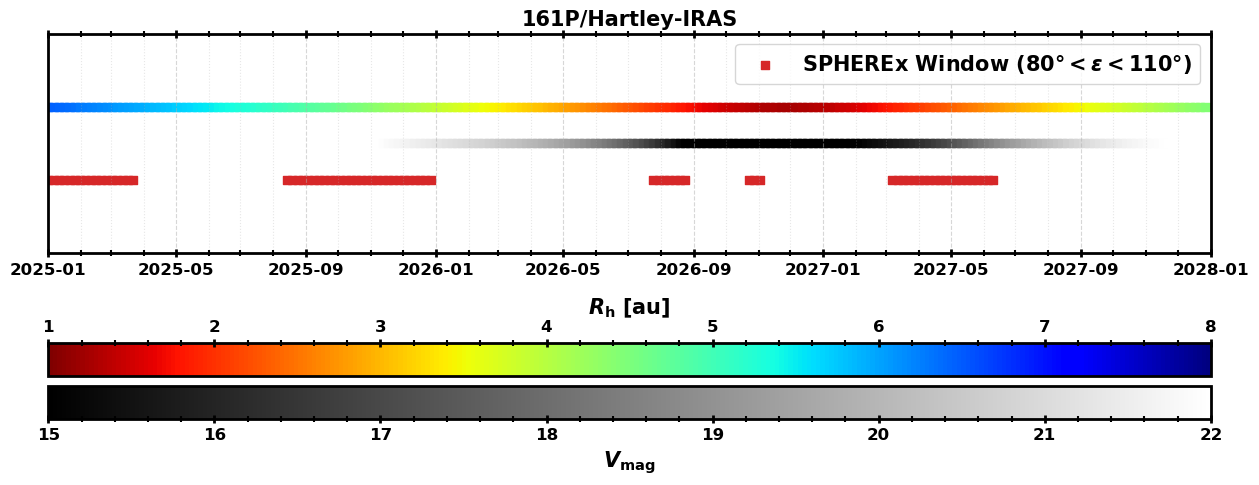

In [121]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot()

date_list = pd.to_datetime(eph.datetime_jd, unit="D", origin="julian")

sc_r  = ax.scatter(date_list, [1]*len(date_list), c=eph.r, cmap="jet_r", marker="s", vmin=1, vmax=8)
sc_v  = ax.scatter(date_list, [2]*len(date_list), c=eph.Tmag, cmap="gray", marker="s", vmin=15, vmax=22)
sc_sx = ax.scatter(date_list[mask_sx], [3]*sum(mask_sx), c="C3", marker="s", label="SPHEREx Window ($80\degree<\epsilon<110\degree$)")

ax.set_title(f"{eph['targetname'].iloc[0]}")
ax.legend(loc="upper right")

# Add horizontal colorbars
divider = make_axes_locatable(ax)
cax_r = divider.append_axes("bottom", size="15%", pad=0.9)
cax_v = divider.append_axes("bottom", size="15%", pad=0.1)
cb_r = plt.colorbar(sc_r, cax=cax_r, orientation="horizontal")
cb_r.set_label(r"$R_\mathrm{h}$ [au]")
cb_r.ax.xaxis.set_ticks_position('top')
cb_r.ax.xaxis.set_label_position('top')
cb_v = plt.colorbar(sc_v, cax=cax_v, orientation="horizontal")
cb_v.set_label(r"$V_\mathrm{mag}$")
cb_v.ax.xaxis.set_ticks_position('bottom')
cb_v.ax.xaxis.set_label_position('bottom')

ax.set_xlim(date_list.min(), date_list.max()+pd.Timedelta(days=5))
ax.set_ylim(5, -1)
ax.set_yticks([])
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.grid(True, axis="x", which="major", linestyle="--", alpha=0.5)
ax.grid(True, axis="x", which="minor", linestyle=":", alpha=0.3)